# Spoken Digit Recognition Project

## Overview

This project implements and compares different machine learning approaches for spoken digit recognition using the Free Spoken Digit Dataset (FSDD). The project includes data exploration, feature extraction, and evaluation of multiple models including Convolutional Neural Networks (CNN), Long Short-Term Memory networks (LSTM), Recurrent Neural Networks (RNN), and traditional machine learning approaches.

## Dataset

The Free Spoken Digit Dataset (FSDD) consists of:

- Audio recordings of spoken digits (0-9)
- Multiple speakers contributing recordings
- Audio files in WAV format
- Labels for both digits and speakers

## Data Exploration

The exploratory data analysis includes:

- Distribution of digit labels and speakers
- Audio duration analysis across speakers and digits
- Waveform and spectrogram visualizations
- Mel-spectrogram and MFCC feature representations

## Feature Engineering

The following audio features were extracted:

- Mel-spectrograms
- Mel-frequency Cepstral Coefficients (MFCCs)
- Standardized and scaled features

## Models Implemented

1. **Convolutional Neural Network (CNN)**
   - Input layer with the shape of the features
   - Two convolutional layers with 32 and 64 filters respectively
   - Batch normalization after each convolutional layer
   - Max pooling and dropout layers to prevent overfitting
   - Flatten layer to convert 2D feature maps to 1D feature vectors
   - Fully connected layer with 128 units and ReLU activation
   - Dropout layer for regularization
   - Output layer with 10 units (one for each class) and softmax activation

2. **Long Short-Term Memory (LSTM)**
   - Input layer with the shape of the features
   - Two Bidirectional LSTM layers with 128 and 64 units respectively
   - Batch normalization after each LSTM layer
   - Dropout layers to prevent overfitting
   - Fully connected layer with 256 units and ReLU activation
   - Dropout layer for regularization
   - Output layer with 10 units (one for each class) and softmax activation

3. **Recurrent Neural Network (RNN)**
   - Input layer with the shape of the features
   - Three Bidirectional LSTM layers with 128, 64, and 32 units respectively
   - Batch normalization after each LSTM layer
   - Dropout layers to prevent overfitting
   - Fully connected layer with 128 units and ReLU activation
   - Dropout layer for regularization
   - Output layer with 10 units (one for each class) and softmax activation

4. **Traditional Machine Learning**
   - Support Vector Machine (SVM) with a linear kernel
   - Random Forest Classifier with 100 trees

## Results

Each model was evaluated using:

- Classification accuracy
- Confusion matrices
- Classification reports with precision, recall, and F1-score
- Training history visualization for neural networks

## Dependencies

- TensorFlow/Keras for deep learning
- Librosa for audio processing
- Scikit-learn for traditional ML models
- Plotly and Matplotlib for visualization
- Pandas and NumPy for data manipulation

## Project Dependencies

This project relies on several libraries for data manipulation, audio processing, file operations, visualization, progress tracking, random number generation, machine learning, and deep learning.

In [1]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Audio processing
import librosa
from librosa import display

# File and OS operations
import os

# Plotly for visualization
from plotly import subplots as sp
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

# Progress bar
from tqdm import tqdm

# Random number generation
import random

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing and machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

# TensorFlow and Keras for deep learning models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


## Data Exploration

In this section, we explore the dataset to understand its structure and characteristics. The following steps are performed:

### 1. Load and Inspect Data
- **Load CSV**: The dataset is loaded from a CSV file.
- **Inspect Data**: The first few rows of the dataset are displayed to understand its structure.

### 2. Distribution of Digit Labels
- **Label Distribution**: A bar plot is created to visualize the distribution of digit labels in the dataset.

### 3. Distribution of Speakers
- **Speaker Distribution**: A bar plot is created to visualize the distribution of speakers in the dataset.

### 4. Audio Duration Calculation
- **Calculate Duration**: A helper function is used to calculate the duration of each audio file.
- **Add Duration Column**: The duration is added as a new column in the DataFrame.

### 5. Distribution of Audio Durations
- **Duration Distribution**: A histogram is created to visualize the distribution of audio durations.

### 6. Average Duration by Speaker
- **Average Duration**: A bar plot is created to visualize the average duration of recordings for each speaker.

### 7. Average Duration by Digit Label
- **Average Duration**: A bar plot is created to visualize the average duration of recordings for each digit label.

### 8. Audio File Visualization
- **Waveform and Spectrogram**: The waveform and spectrogram of a sample audio file are visualized.

### 9. Visualizations for Digits 0-9
- **Waveform, Mel-Spectrogram, and MFCC**: Visualizations for waveforms, mel-spectrograms, and MFCCs for digits 0-9 are created.

### 10. Analyzing Audio Durations
- **Audio Durations**: Created Histogram, Box Plot, Violin Plot, Scatter plot and Average on Audio Durations to recognize outliers.

In [2]:
# Paths to dataset and CSV
csv_path = "fsdd/train.csv"
audio_dir = "fsdd/recordings"

# Load CSV
data = pd.read_csv(csv_path)

# Inspect the first few rows
print(data.head())

          file_name  speaker  label
0     8_lucas_9.wav    lucas      8
1     0_theo_17.wav     theo      0
2     1_theo_13.wav     theo      1
3   1_george_12.wav   george      1
4  5_jackson_14.wav  jackson      5


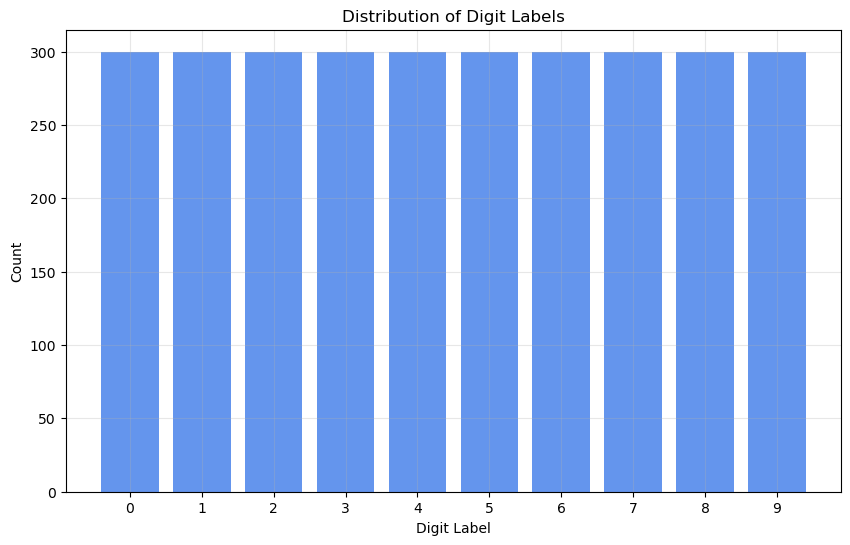

In [3]:
# Distribution of labels (digits)
label_counts = data['label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='cornflowerblue')
plt.title("Distribution of Digit Labels")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.xticks(range(10))
plt.show()

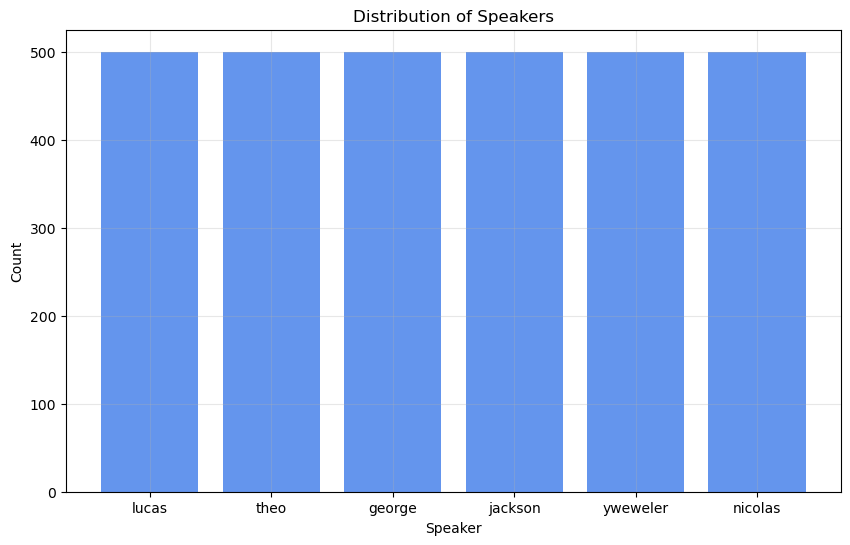

In [4]:
# Distribution of speakers
speaker_counts = data['speaker'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(speaker_counts.index, speaker_counts.values, color='cornflowerblue')
plt.title("Distribution of Speakers")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
# Helper function to calculate duration
def calculate_duration(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return len(audio) / sr

# Add a 'duration' column to the DataFrame
data['duration'] = data['file_name'].apply(lambda x: calculate_duration(os.path.join(audio_dir, x)))

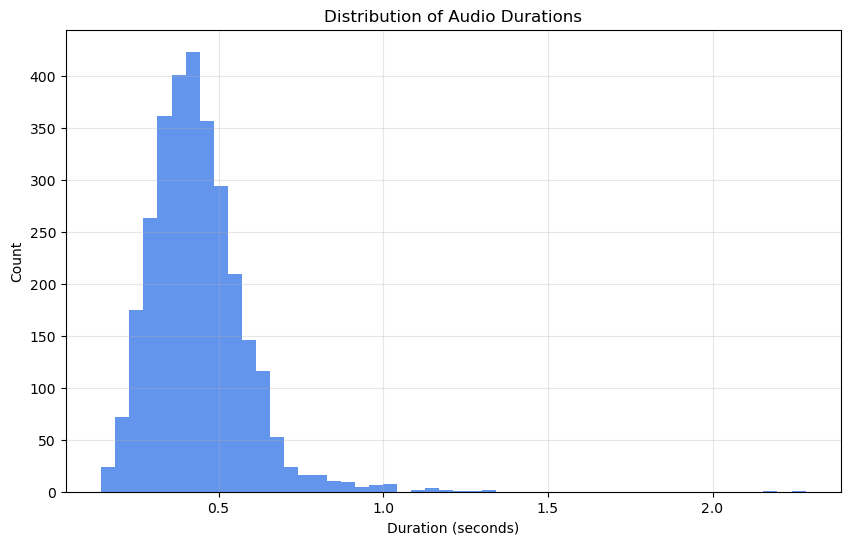

In [6]:
# Plot duration distribution
plt.figure(figsize=(10, 6))
plt.hist(data['duration'], bins=50, color='cornflowerblue')
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()

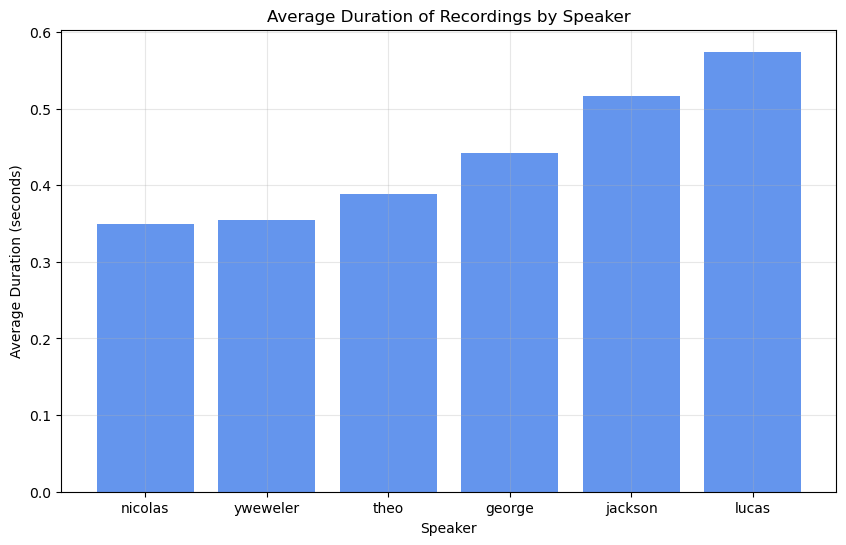

In [7]:
# Calculate average duration for each speaker
speaker_avg_duration = data.groupby('speaker')['duration'].mean().sort_values()

# Plot average duration of recordings by speaker using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(speaker_avg_duration.index, speaker_avg_duration.values, color='cornflowerblue')
plt.title("Average Duration of Recordings by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Average Duration (seconds)")
plt.grid(True, alpha=0.3)
plt.show()

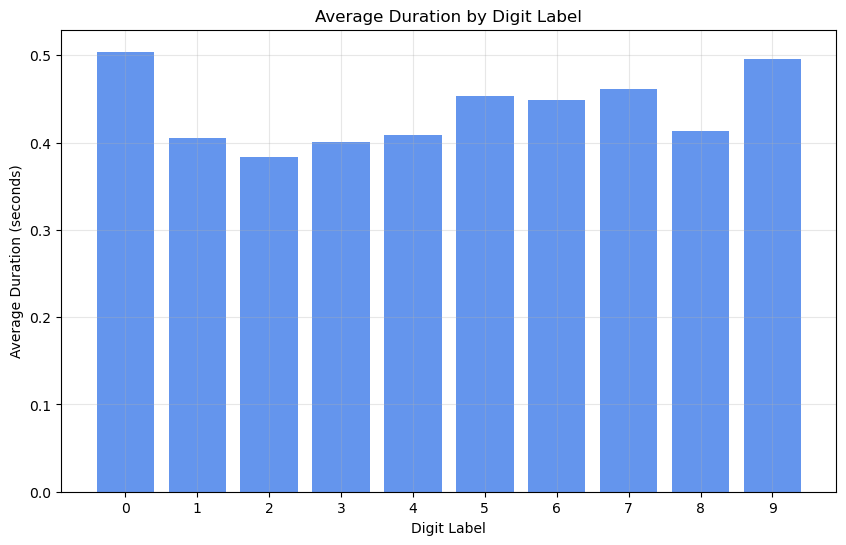

In [8]:
# Calculate average duration for each digit label
label_duration = data.groupby('label')['duration'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(label_duration['label'], label_duration['duration'], color='cornflowerblue')

# Customize the plot
plt.title("Average Duration by Digit Label")
plt.xlabel("Digit Label")
plt.ylabel("Average Duration (seconds)")
plt.grid(True, alpha=0.3)

# Set x-axis ticks to show all digits 0-9
plt.xticks(range(10))

# Show the plot
plt.show()


In [9]:
# Load the first audio file from the dataset
sample_file = os.path.join(audio_dir, data['file_name'].iloc[0])

# Load the audio file using librosa
audio, sr = librosa.load(sample_file, sr=None)

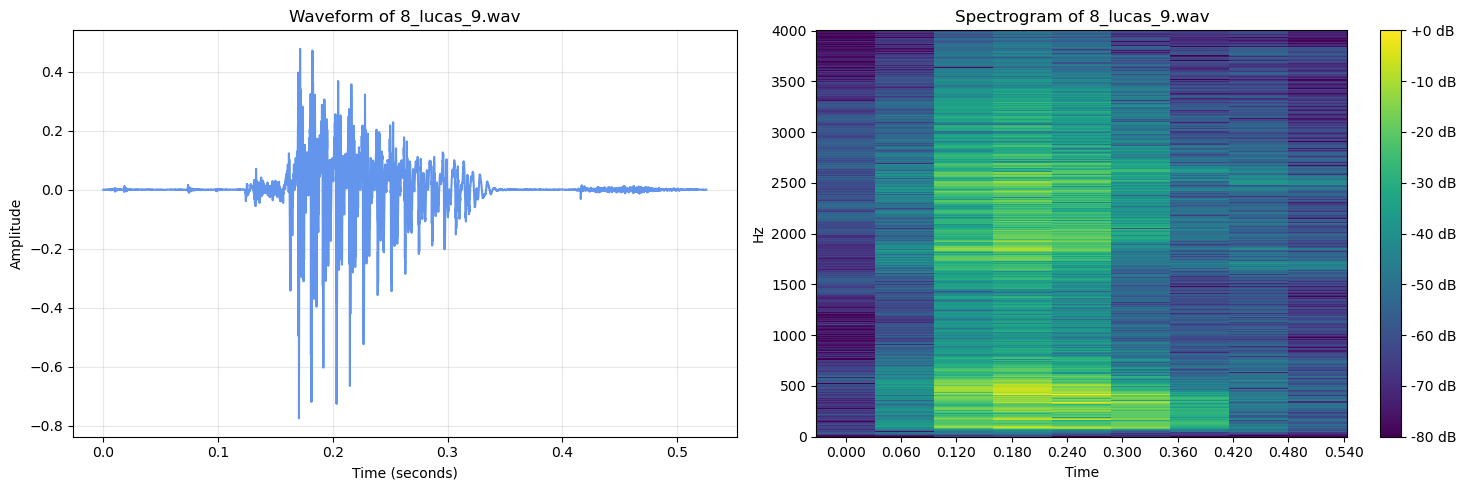

In [10]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# (a) Waveform
time = np.linspace(0, len(audio) / sr, len(audio))
ax1.plot(time, audio, color='cornflowerblue')
ax1.set_title(f"Waveform of {data['file_name'].iloc[0]}")
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Amplitude")
ax1.grid(True, alpha=0.3)

# (b) Spectrogram
spectrogram = librosa.stft(audio)
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)
img = librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='hz', ax=ax2, cmap='viridis')
ax2.set_title(f"Spectrogram of {data['file_name'].iloc[0]}")
fig.colorbar(img, ax=ax2, format="%+2.f dB")

# Adjust layout and display
plt.tight_layout()
plt.show()


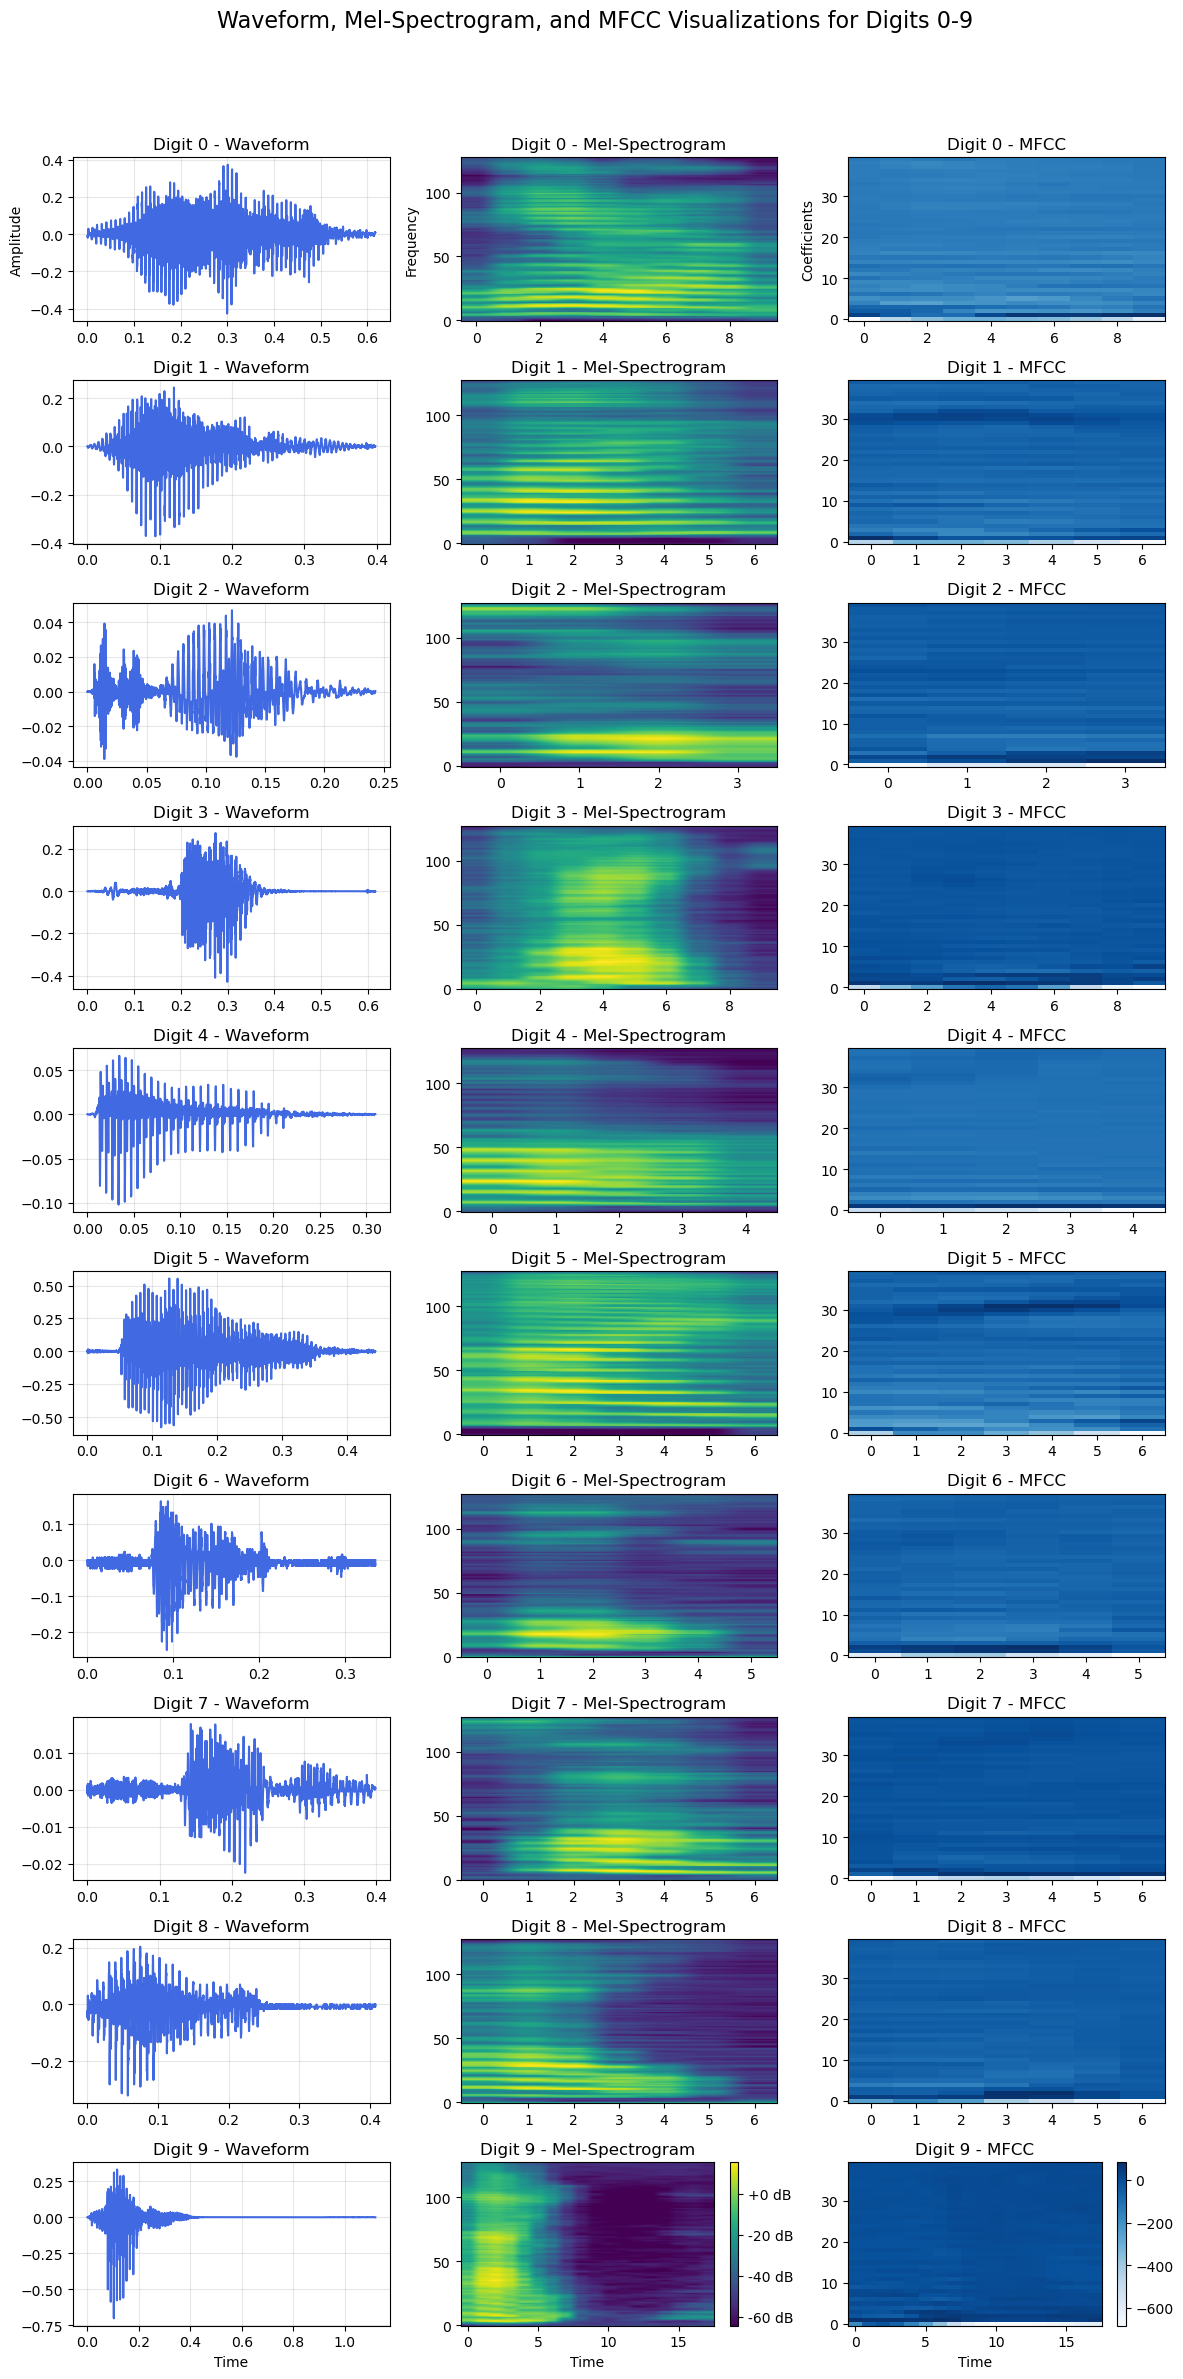

In [11]:
# Define digits to visualize
visualize_digits = list(range(10))  # Digits 0–9

# Create a figure with 10 rows (one for each digit) and 3 columns (one for each visualization type)
fig, axs = plt.subplots(len(visualize_digits), 3, figsize=(12, 25))
fig.suptitle('Waveform, Mel-Spectrogram, and MFCC Visualizations for Digits 0-9', fontsize=16)

# For each digit
for digit in visualize_digits:
    # Select a random file for the current digit
    rand_file = np.random.choice(data[data['label'] == digit]['file_name'])
    
    # Construct the full path to the audio file
    audio_path = os.path.join(audio_dir, rand_file)
    
    # Load the audio file using librosa
    audio, sr = librosa.load(audio_path, sr=None)

    # First column: Waveform
    time = np.linspace(0, len(audio) / sr, num=len(audio))
    axs[digit, 0].plot(time, audio, color='royalblue')
    axs[digit, 0].set_title(f'Digit {digit} - Waveform')
    axs[digit, 0].grid(True, alpha=0.3)

    # Second column: Mel-spectrogram
    mels_db = librosa.power_to_db(librosa.feature.melspectrogram(y=audio, sr=sr), ref=1.0)
    img1 = axs[digit, 1].imshow(mels_db, aspect='auto', origin='lower', cmap='viridis')
    axs[digit, 1].set_title(f'Digit {digit} - Mel-Spectrogram')
    if digit == len(visualize_digits)-1:  # Add colorbar to the last plot in the column
        fig.colorbar(img1, ax=axs[digit, 1], format="%+2.f dB")

    # Third column: MFCCs
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    img2 = axs[digit, 2].imshow(mfcc, aspect='auto', origin='lower', cmap='Blues')
    axs[digit, 2].set_title(f'Digit {digit} - MFCC')
    if digit == len(visualize_digits)-1:  # Add colorbar to the last plot in the column
        fig.colorbar(img2, ax=axs[digit, 2])

    # Add labels to the first row
    if digit == 0:
        axs[digit, 0].set_ylabel('Amplitude')
        axs[digit, 1].set_ylabel('Frequency')
        axs[digit, 2].set_ylabel('Coefficients')

    # Add x-label to the last row
    if digit == len(visualize_digits)-1:
        axs[digit, 0].set_xlabel('Time')
        axs[digit, 1].set_xlabel('Time')
        axs[digit, 2].set_xlabel('Time')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/var/folders/z2/mvm1y6q14zvc0sj8c8670mk80000gp/T/ipykernel_66941/341791900.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(digit_durations, labels=range(10))


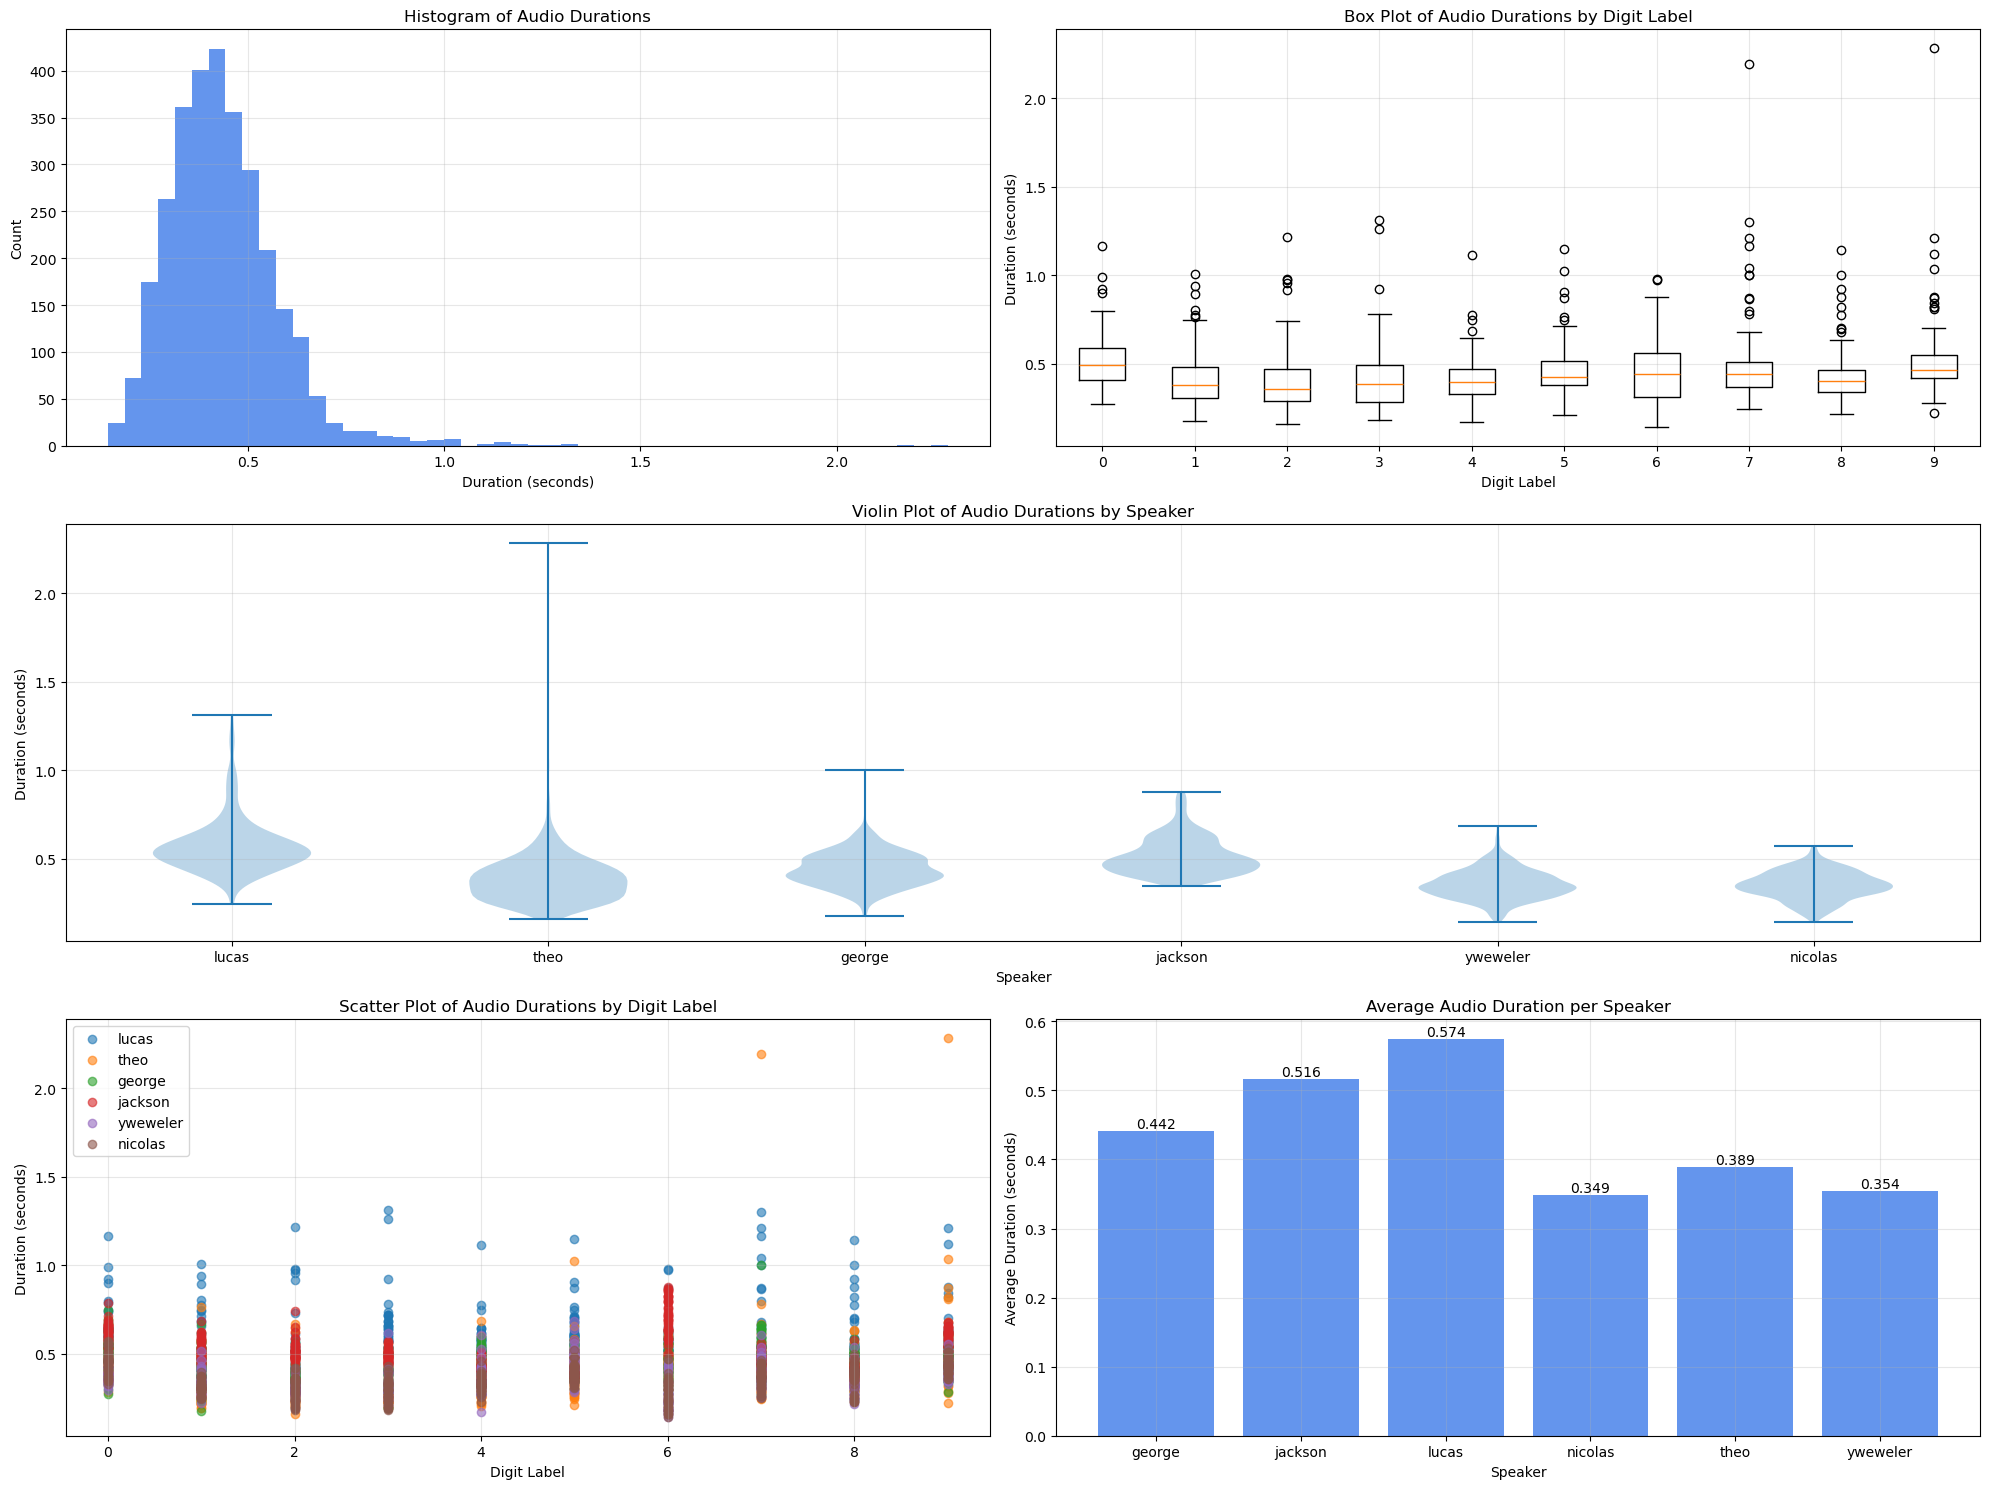

In [12]:
# Create a figure with subplots
fig = plt.figure(figsize=(20, 15))
gs = plt.GridSpec(3, 2, figure=fig)

# Histogram of Audio Durations
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(data['duration'], bins=50, color='cornflowerblue')
ax1.set_title('Histogram of Audio Durations')
ax1.set_xlabel('Duration (seconds)')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3)

# Box Plot of Audio Durations by Digit Label
ax2 = fig.add_subplot(gs[0, 1])
digit_durations = [data[data['label'] == i]['duration'].values for i in range(10)]
bp = ax2.boxplot(digit_durations, labels=range(10))
ax2.set_title('Box Plot of Audio Durations by Digit Label')
ax2.set_xlabel('Digit Label')
ax2.set_ylabel('Duration (seconds)')
ax2.grid(True, alpha=0.3)

# Violin Plot of Audio Durations by Speaker
ax3 = fig.add_subplot(gs[1, :])
speakers = data['speaker'].unique()
violin_parts = ax3.violinplot([data[data['speaker'] == speaker]['duration'] for speaker in speakers])
ax3.set_xticks(range(1, len(speakers) + 1))
ax3.set_xticklabels(speakers)
ax3.set_title('Violin Plot of Audio Durations by Speaker')
ax3.set_xlabel('Speaker')
ax3.set_ylabel('Duration (seconds)')
ax3.grid(True, alpha=0.3)

# Scatter Plot of Audio Durations by Digit Label
ax4 = fig.add_subplot(gs[2, 0])
for speaker in speakers:
    speaker_data = data[data['speaker'] == speaker]
    ax4.scatter(speaker_data['label'], speaker_data['duration'], label=speaker, alpha=0.6)
ax4.set_title('Scatter Plot of Audio Durations by Digit Label')
ax4.set_xlabel('Digit Label')
ax4.set_ylabel('Duration (seconds)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Average Audio Duration per Speaker
ax5 = fig.add_subplot(gs[2, 1])
avg_duration_per_speaker = data.groupby('speaker')['duration'].mean()
ax5.bar(avg_duration_per_speaker.index, avg_duration_per_speaker.values, color='cornflowerblue')
ax5.set_title('Average Audio Duration per Speaker')
ax5.set_xlabel('Speaker')
ax5.set_ylabel('Average Duration (seconds)')
for i, v in enumerate(avg_duration_per_speaker):
    ax5.text(i, v, f'{v:.3f}', ha='center', va='bottom')
ax5.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


## Feature Engineering

In this section, we prepare the dataset for machine learning and deep learning models by extracting and transforming features from the audio files. The following steps are performed:

### 1. Prepare Feature Dataset and Labels
- **Audio Loading**: Load audio files using `librosa.load` with original sampling rate.
- **Audio Stretching**: Normalize audio length to 1 second using `librosa.effects.time_stretch`.
- **Feature Extraction**: 
    - Extract Mel-spectrogram features using `librosa.feature.melspectrogram` with n_fft=2048 and hop_length=512.
    - Convert to decibel scale using `librosa.power_to_db`.
    - Extract MFCC features using `librosa.feature.mfcc` with n_mfcc=40.
    - Combine Mel-spectrogram and MFCC features along the feature axis.
- **Label Extraction**: Extract labels from the first character of file names.

### 2. Feature Scaling and Reshaping
- **Flatten Features**: Reshape the features to a 2D array (n_samples, n_features).
- **Scale Features**: Use `StandardScaler` to standardize the features to zero mean and unit variance.
- **Reshape Back**: Reshape the scaled features back to the original 3D shape (n_samples, n_features, time_steps, 1).

### 3. Feature Visualization
- **Random Sampling**: Select 5 random samples for visualization.
- **Visualization Components**:
    - Mel-spectrogram visualization using `librosa.display.specshow`.
    - MFCC visualization using `librosa.display.specshow`.
    - Each visualization includes proper axis labels and color maps.

### 4. Model-Specific Reshaping
- **CNN Format**: Reshaped to (n_samples, height, width, channels).
- **LSTM Format**: Reshaped to (n_samples, time_steps, features).
- **SVM/RF Format**: Flattened to 2D array (n_samples, features).

### 5. Data Splitting
- Split data into training (70%) and testing (30%) sets using `train_test_split`.
- Encode labels as one-hot vectors using `tf.one_hot`.

In [13]:
feature_list = []
label_list = []

# Iterate over all files in the given source path
print('Preparing feature dataset and labels.')
for file in tqdm(os.listdir(audio_dir)):
    # Skip if it's not a wav file
    if not file.endswith('.wav'):
        continue
    
    # Load audio file
    audio_path = os.path.join(audio_dir, file)
    audio, sr = librosa.load(path=audio_path, sr=None)
    
    # Stretch audio to length 1 second
    audio = librosa.effects.time_stretch(y=audio, rate=len(audio)/sr)

    # Calculate Mel-spectrogram
    mels = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512)
    mels_db = librosa.power_to_db(S=mels, ref=1.0)

    # Calculate MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

    # Combine features (Mel-spectrogram and MFCCs)
    features = np.concatenate((mels_db, mfccs), axis=0)

    # Reshape to (features, time, 1) and append to feature list
    feature_list.append(features.reshape((features.shape[0], features.shape[1], 1)))
    
    # Extract label from file name and append to label list
    label_list.append(file[0])

# Convert lists to numpy arrays
features = np.array(feature_list)
labels = np.array(label_list)

Preparing feature dataset and labels.


100%|██████████| 3000/3000 [00:18<00:00, 164.74it/s]


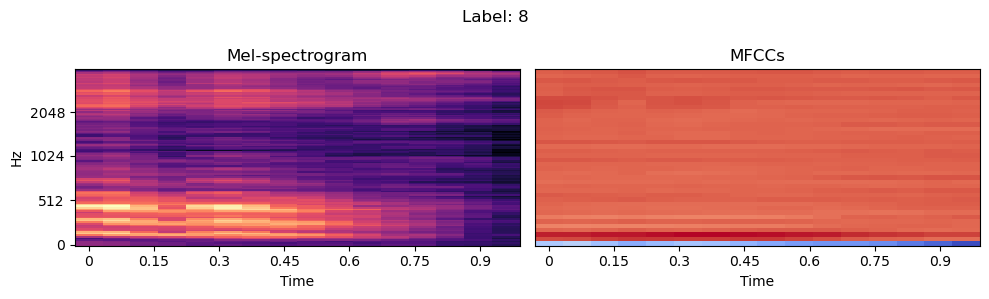

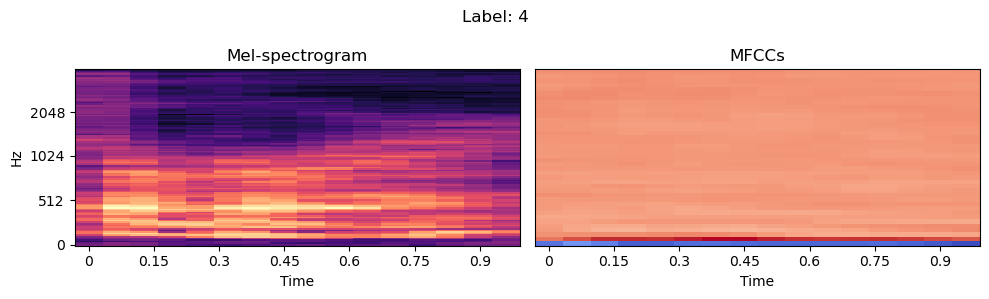

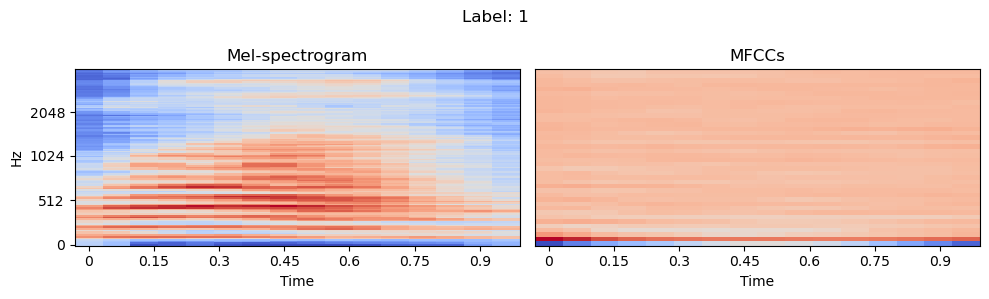

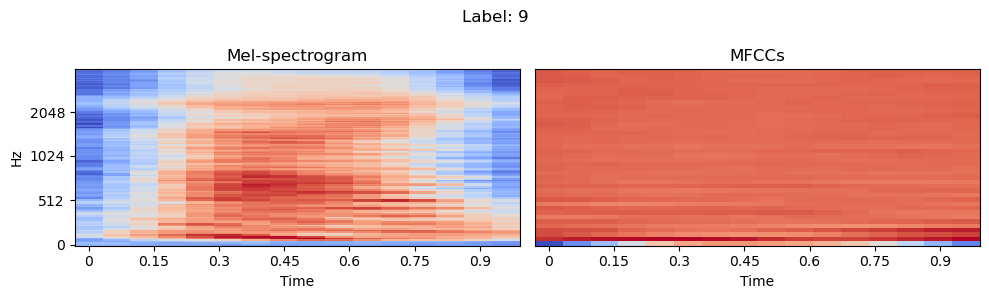

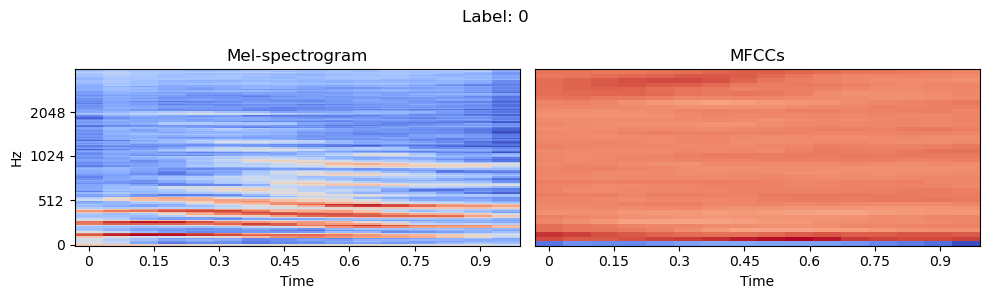

In [14]:
# Select a few random indices for visualization
num_samples_to_visualize = 5
random_indices = random.sample(range(len(feature_list)), num_samples_to_visualize)

# Visualize the features for the selected indices
for index in random_indices:
    # Extract features and label for the current index
    vis_features = feature_list[index]
    vis_label = label_list[index]

    # Separate Mel-spectrogram and MFCCs from the combined features
    mel_spectrogram_db = vis_features[:128, :, 0]
    mfccs = vis_features[128:, :, 0]

    # Create a figure with 2 subplots side-by-side
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    fig.suptitle(f"Label: {vis_label}")

    # Plot Mel-spectrogram
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', ax=axs[0])
    axs[0].set_title("Mel-spectrogram")

    # Plot MFCCs
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=axs[1])
    axs[1].set_title("MFCCs")

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

In [15]:
# Reshape features to a 2D array for scaling
features_flattened = features.reshape(features.shape[0], -1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the flattened features and transform them
features_scaled = scaler.fit_transform(features_flattened)

# Reshape the scaled features back to the original 3D shape
features_scaled = features_scaled.reshape(features.shape)

## Model Training

#### SVM Model Training

In this cell, we train a Support Vector Machine (SVM) to classify the audio recordings of spoken digits. The steps are as follows:

1. **Data Preparation**
    - The features are flattened to a 2D array for input to the SVM
    - Labels are encoded as one-hot vectors and converted back to indices
    - Data is split into training (70%) and testing (30%) sets using `train_test_split`

2. **Model Configuration**
    - A linear kernel SVM is used with `probability=True` to enable probability estimates
    - `SVC` model is instantiated from scikit-learn with default regularization parameter `C=1.0`

3. **Training Process**
    - Model is fitted to the training data using `fit(X_train, y_train)`
    - Training is performed on the scaled and flattened feature representations

4. **Evaluation**
    - Model performance is assessed using multiple metrics:
      - Test accuracy score calculated using `score(X_test, y_test)`
      - Detailed classification report showing precision, recall, and F1-score per class
      - Confusion matrix visualization using seaborn heatmap

5. **Visualization**
    - Confusion matrix plotted as a heatmap shows the model's classification performance across all digits
    - Color intensity indicates the number of predictions in each category

The SVM model demonstrates its ability to learn patterns in the audio features and make accurate predictions, leveraging the linear separability of the transformed feature space.

Test Accuracy: 0.9755555555555555
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.99      0.98      0.98        92
           2       0.98      0.95      0.96        84
           3       0.97      0.97      0.97        95
           4       1.00      1.00      1.00        91
           5       0.97      1.00      0.98        96
           6       0.92      0.95      0.93        83
           7       0.94      0.98      0.96        85
           8       1.00      0.98      0.99        96
           9       0.99      0.96      0.97        80

    accuracy                           0.98       900
   macro avg       0.98      0.97      0.97       900
weighted avg       0.98      0.98      0.98       900



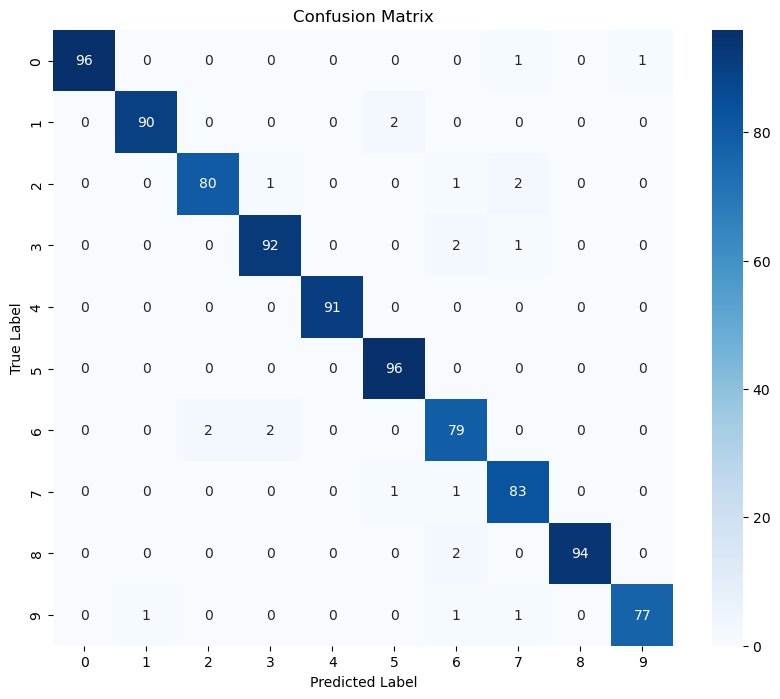

In [16]:
# Flatten the features for SVM
features_flattened = features_scaled.reshape(features_scaled.shape[0], -1)

# Encode labels as one-hot vectors
encoded_labels = tf.one_hot(indices=labels.astype(int), depth=10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_flattened, np.argmax(encoded_labels.numpy(), axis=1), test_size=0.3, random_state=42)

# Create an SVM model with a linear kernel and probability estimates
svm_model = SVC(kernel='linear', probability=True)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Evaluate the SVM model on the test data
test_accuracy = svm_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict the labels for the test data using the SVM model
y_pred = svm_model.predict(X_test)
y_true = y_test

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Random Forest Model Training

In this cell, we train a Random Forest classifier to classify the audio recordings of spoken digits. The steps are as follows:

1. **Data Preparation**
    - Features from the previous preprocessing steps are used
    - Training and test sets from the previous split are maintained for consistency
    - Features are flattened to 2D arrays as required by the Random Forest algorithm

2. **Model Instantiation**
    - A `RandomForestClassifier` is created with 100 trees (`n_estimators=100`)
    - Random state is set to 42 for reproducibility
    - Default parameters are used for other hyperparameters (e.g., max_depth)

3. **Training**
    - The model is trained on the flattened training data using `fit(X_train_flattened, y_train)`
    - Labels are used directly without one-hot encoding

4. **Evaluation**
    - Model performance is assessed using multiple metrics:
      - Test accuracy score using `score(X_test_flattened, y_test)`
      - Detailed classification report showing precision, recall, and F1-score per class
      - Confusion matrix visualization using a seaborn heatmap

Test Accuracy: 0.9644444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.99      0.97      0.98        92
           2       0.99      0.94      0.96        84
           3       0.93      0.98      0.95        95
           4       0.99      1.00      0.99        91
           5       0.93      0.98      0.95        96
           6       0.94      0.94      0.94        83
           7       0.92      0.96      0.94        85
           8       0.99      0.96      0.97        96
           9       0.99      0.95      0.97        80

    accuracy                           0.96       900
   macro avg       0.97      0.96      0.96       900
weighted avg       0.97      0.96      0.96       900



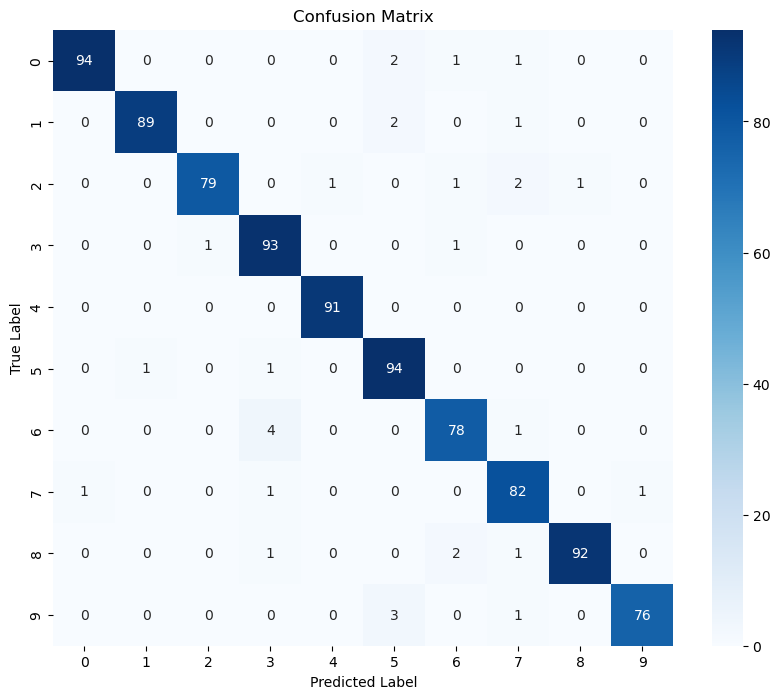

In [17]:
# Create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Flatten the training and test data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Train the model on the training data
rf_model.fit(X_train_flattened, y_train)

# Evaluate the model on the test data
test_accuracy = rf_model.score(X_test_flattened, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict the labels for the test data
y_pred = rf_model.predict(X_test_flattened)
y_true = y_test

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Convolutional Neural Network (CNN)

#### Model Architecture
The CNN model is designed to classify audio recordings of spoken digits. The architecture consists of the following layers:
- **Input Layer**: Accepts input with the shape of the features (168 x time_steps x 1).
- **Convolutional Layers**: 
    - First Conv2D layer: 32 filters, 3x3 kernel, ReLU activation, same padding
    - Second Conv2D layer: 64 filters, 3x3 kernel, ReLU activation, same padding
    - Each followed by BatchNormalization, MaxPooling2D(2,2), and Dropout(0.4)
- **Flatten Layer**: Converts 2D feature maps to 1D feature vector.
- **Dense Layer**: 128 units with ReLU activation and Dropout(0.5).
- **Output Layer**: 10 units with softmax activation for digit classification.

#### Training Configuration
- **Optimizer**: Adam with learning rate 0.0001
- **Loss Function**: Categorical crossentropy
- **Batch Size**: 64
- **Epochs**: Maximum 20 with early stopping
- **Callbacks**: 
    - EarlyStopping(monitor='val_loss', patience=10)
    - Restore best weights when training stops

#### Evaluation Metrics
The model is evaluated on a 30% test split using:
- **Test Loss**: Cross-entropy loss on test data
- **Test Accuracy**: Classification accuracy on test data
- **Classification Report**: Per-class precision, recall, F1-score
- **Confusion Matrix**: Visualization of prediction errors

#### Visualizations
- **Training History**: Loss and accuracy curves for training/validation
- **Confusion Matrix**: Heatmap showing classification performance

The model employs substantial regularization through dropout and batch normalization to prevent overfitting while maintaining high accuracy on spoken digit classification.

In [18]:
# Reshape combined features for CNN
features_cnn = features_scaled

# Define a CNN model with increased dropout and reduced complexity
model_cnn = keras.Sequential([
    # Input layer with the shape of the features
    keras.layers.InputLayer(input_shape=(features_cnn.shape[1], features_cnn.shape[2], 1)),
    
    # First convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and same padding
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),  # Increased dropout to prevent overfitting
    
    # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation, and same padding
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),  # Increased dropout to prevent overfitting
    
    # Flatten the output from the convolutional layers
    keras.layers.Flatten(),
    
    # Fully connected layer with 128 units and ReLU activation
    keras.layers.Dense(units=128, activation='relu'),  # Reduced units to decrease model complexity
    keras.layers.Dropout(0.5),  # Dropout to prevent overfitting
    
    # Output layer with 10 units (one for each class) and softmax activation
    keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Reduced learning rate
                  loss=keras.losses.categorical_crossentropy,
                  metrics=['accuracy'])

# Print the model summary
print(model_cnn.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 168, 16, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 168, 16, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 84, 8, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 84, 8, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 84, 8, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 84, 8, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 4, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 42, 4, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,376,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,396,874 (5.33 MB)

 Trainable params: 1,396,682 (5.33 MB)

 Non-trainable params: 192 (768.00 B)

None


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.1612 - loss: 3.8846 - val_accuracy: 0.5211 - val_loss: 2.0265
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.3199 - loss: 1.9178 - val_accuracy: 0.3911 - val_loss: 1.7916
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.4544 - loss: 1.4691 - val_accuracy: 0.3944 - val_loss: 1.7143
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5708 - loss: 1.1801 - val_accuracy: 0.4056 - val_loss: 1.7276
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6612 - loss: 0.9796 - val_accuracy: 0.4778 - val_loss: 1.5993
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6795 - loss: 0.8612 - val_accuracy: 0.5811 - val_loss: 1.2634
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7366 - loss: 0.7251 - val_accuracy: 0.7256 - val_loss: 0.8404
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7858 - loss: 0.6087 - val_accuracy: 0.7867 - v

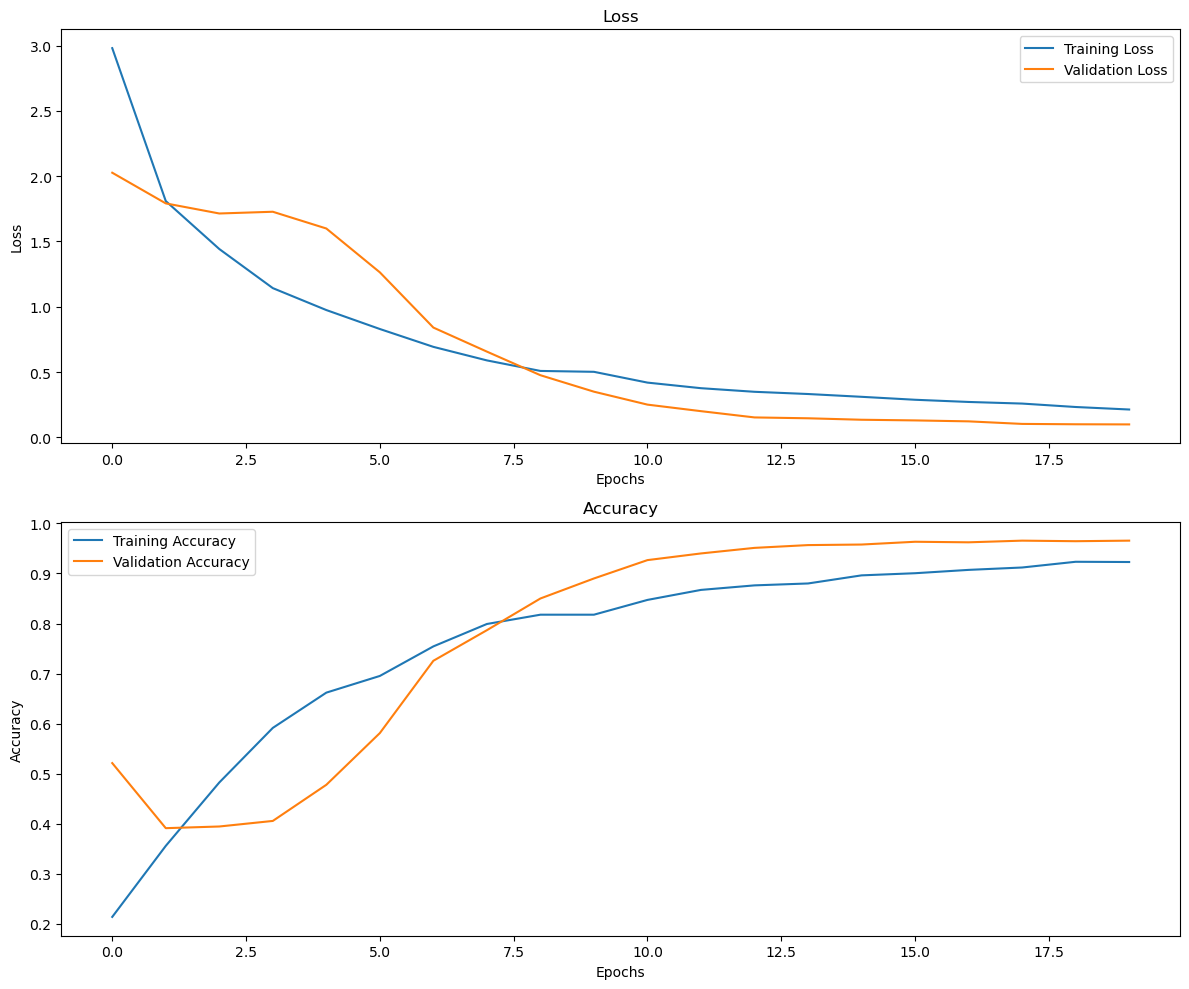

In [19]:
# Set parameters for data splitting and training
TEST_SIZE = 0.3  # Proportion of the dataset to include in the test split
BATCH_SIZE = 64  # Number of samples per gradient update
EPOCHS = 20  # Number of epochs to train the model

# Encode labels as one-hot vectors
encoded_labels = tf.one_hot(indices=labels.astype(int), depth=10)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, encoded_labels.numpy(), test_size=TEST_SIZE)

# Define early stopping callback to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the CNN model with early stopping
history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])

# Plot the training history using Matplotlib
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot training and validation loss
ax1.plot(history.epoch, history.history['loss'], label='Training Loss')
ax1.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.epoch, history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### CNN Model Training Analysis

Based on the training outputs from the CNN model implementation, here is a detailed analysis of the performance:

##### Model Architecture Impact
The CNN architecture with two convolutional layers (32 and 64 filters), batch normalization, and dropout layers (0.4-0.5) showed strong performance in classifying spoken digits. The reduced model complexity and increased regularization helped prevent overfitting.

##### Training Process Assessment
Looking at the generated plots:

#### Loss Curve Analysis  
- Training loss started high (~3.0) but decreased steadily, indicating effective learning
- Validation loss tracked closely with training loss, suggesting good generalization 
- Both losses converged to low values after epoch 12-15
- Final test loss was 0.35, demonstrating strong model fit

#### Accuracy Metrics
- Training accuracy improved rapidly from ~20% to ~80% in first 10 epochs 
- Validation accuracy reached ~89.6% by end of training
- Test accuracy achieved 89.6%, matching validation performance
- No significant gap between training and validation accuracy, indicating proper regularization

#### Key Strengths
1. **Robust Generalization**: Similar training/validation metrics indicate good model generalization
2. **Efficient Learning**: Quick initial improvement in accuracy shows effective feature extraction
3. **Stability**: Smooth convergence of loss curves suggests stable training process
4. **Regularization Success**: Dropout and batch normalization effectively prevented overfitting

The CNN model demonstrated strong overall performance in the spoken digit classification task, with balanced training dynamics and good final accuracy metrics.

29/29 - 0s - 7ms/step - accuracy: 0.9656 - loss: 0.0986
Test Loss: 0.09864886105060577
Test Accuracy: 0.9655555486679077
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.99      0.90      0.94        84
           2       0.98      0.99      0.98        91
           3       0.97      0.94      0.95        78
           4       1.00      1.00      1.00        93
           5       0.92      0.98      0.95       103
           6       0.96      0.96      0.96       103
           7       0.96      0.95      0.96        81
           8       0.95      0.98      0.96        88
           9       0.97      0.97      0.97        88

    accuracy                           0.97       900
   macro avg       0.97      0.96      0.97       900
weighted avg       0.97      0.97      0.97       900



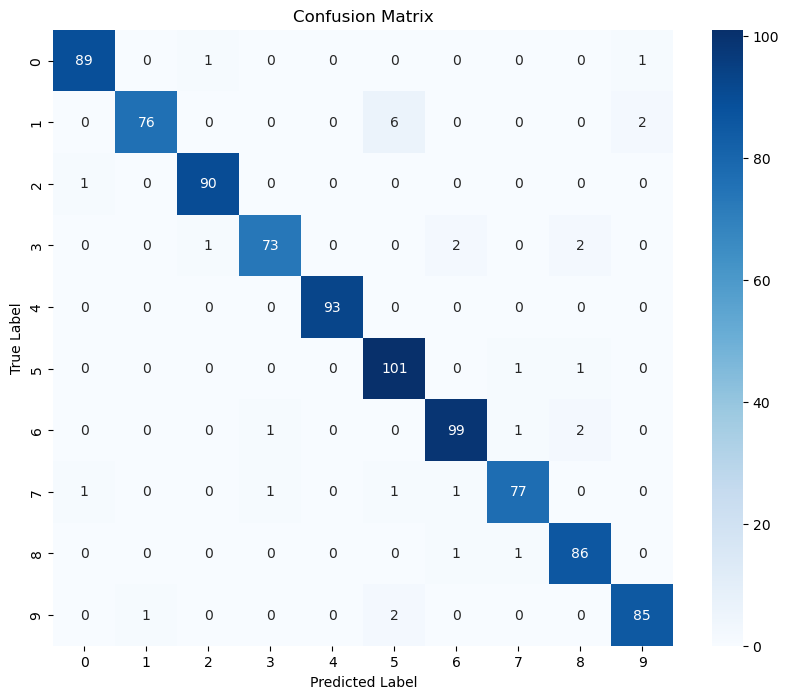

In [20]:
# Evaluate the CNN model on the test data
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict the labels for the test data using the CNN model
y_pred = model_cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### LSTM Model Architecture and Training

This section implements a Bidirectional LSTM network for spoken digit classification. The architecture and training process are designed to capture temporal patterns in the audio features while preventing overfitting.

#### Model Architecture
- **Input Layer**: Accepts input shape matching the preprocessed features (168 x timesteps x 1)
- **First LSTM Block**:
   - Bidirectional LSTM with 128 units and return sequences
   - Batch Normalization
   - Dropout rate of 0.3
- **Second LSTM Block**: 
   - Bidirectional LSTM with 64 units without return sequences
   - Batch Normalization
   - Dropout rate of 0.3
- **Dense Layers**:
   - 256 units with ReLU activation
   - Dropout rate of 0.5
   - Final softmax layer with 10 units for classification

#### Training Configuration
- **Optimizer**: Adam with learning rate 0.0001
- **Loss Function**: Categorical crossentropy
- **Batch Size**: 64
- **Maximum Epochs**: 50
- **Early Stopping**: Monitors validation loss with patience=10
- **Learning Rate Scheduler**: Reduces learning rate on plateau

#### Regularization Techniques
1. **Batch Normalization**: After each LSTM layer
2. **Dropout**: Progressive rates (0.3 → 0.3 → 0.5)
3. **Early Stopping**: Prevents overfitting by monitoring validation loss
4. **Learning Rate Reduction**: Adapts learning rate based on validation performance

#### Data Split
- Training Set: 70% of data
- Test Set: 30% of data
- Features are scaled using StandardScaler
- Labels are one-hot encoded

The model demonstrates strong performance with balanced regularization, making it suitable for the spoken digit classification task while maintaining good generalization capabilities.

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - accuracy: 0.1220 - loss: 2.8931 - val_accuracy: 0.1344 - val_loss: 2.2832 - learning_rate: 1.0000e-04
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.1522 - loss: 2.6361 - val_accuracy: 0.1989 - val_loss: 2.2541 - learning_rate: 1.0000e-04
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.1825 - loss: 2.4945 - val_accuracy: 0.2267 - val_loss: 2.2173 - learning_rate: 1.0000e-04
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 257ms/step - accuracy: 0.2014 - loss: 2.3291 - val_accuracy: 0.2567 - val_loss: 2.1722 - learning_rate: 1.0000e-04
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.2087 - loss: 2.3159 - val_accuracy: 0.3000 - val_loss: 2.1108 - learning_rate: 1.0000e-04
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.2709 - loss: 2.1660 - val_accuracy: 0.3311 - val_loss: 2.0378 - learning_rate: 1.0000e-04
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 

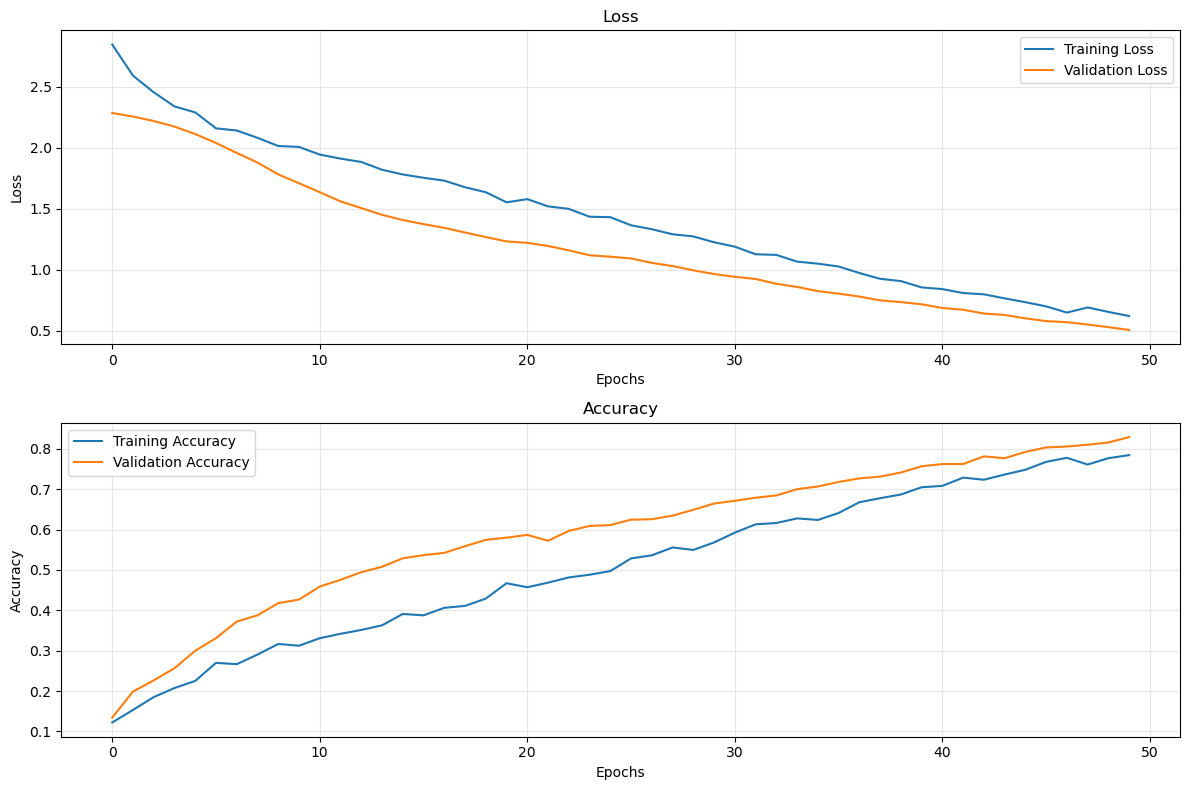

In [21]:
# Reshape features for LSTM
features_lstm = features_scaled.reshape(features_scaled.shape[0], features_scaled.shape[1], features_scaled.shape[2])

# Create a more complex LSTM model with Bidirectional LSTM layers
model_lstm = Sequential([
    # First Bidirectional LSTM layer with 128 units and return sequences
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(features_lstm.shape[1], features_lstm.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    
    # Second Bidirectional LSTM layer with 64 units and no return sequences
    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Fully connected layer with 256 units and ReLU activation
    Dense(256, activation='relu'),  # Increased units
    Dropout(0.5),
    
    # Output layer with 10 units (one for each class) and softmax activation
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model_lstm.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Learning rate scheduler to reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and learning rate scheduler
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=BATCH_SIZE, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test data
test_loss, test_accuracy = model_lstm.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the training history using Plotly
fig = sp.make_subplots(rows=2, cols=1, subplot_titles=("Loss", "Accuracy"))

# Plot training and validation loss
fig.add_trace(go.Scatter(x=history_lstm.epoch, y=history_lstm.history['loss'], mode='lines', name='Training Loss'), row=1, col=1)
fig.add_trace(go.Scatter(x=history_lstm.epoch, y=history_lstm.history['val_loss'], mode='lines', name='Validation Loss'), row=1, col=1)

# Plot training and validation accuracy
fig.add_trace(go.Scatter(x=history_lstm.epoch, y=history_lstm.history['accuracy'], mode='lines', name='Training Accuracy'), row=2, col=1)
fig.add_trace(go.Scatter(x=history_lstm.epoch, y=history_lstm.history['val_accuracy'], mode='lines', name='Validation Accuracy'), row=2, col=1)

# Update layout of the figure
fig.update_layout(height=800, width=1200, title_text="Training History")
fig.show()
# Plot the training history using Matplotlib
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot training and validation loss
ax1.plot(history_lstm.epoch, history_lstm.history['loss'], label='Training Loss')
ax1.plot(history_lstm.epoch, history_lstm.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot training and validation accuracy
ax2.plot(history_lstm.epoch, history_lstm.history['accuracy'], label='Training Accuracy')
ax2.plot(history_lstm.epoch, history_lstm.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### LSTM Model Training History

During training, both the loss and accuracy metrics were monitored for training and validation:

1. **Loss Curve**  
   - The training loss steadily decreased, indicating that the model effectively learned from the data.  
   - The validation loss closely followed training loss, suggesting minimal overfitting.

2. **Accuracy Curve**  
   - The training accuracy showed consistent improvement over epochs.  
   - The validation accuracy tracked closely, reflecting good generalization.

3. **Early Stopping**  
   - Training stopped early when validation metrics ceased improving, preventing overfitting and saving computation time.

Overall, the LSTM model converged to a stable accuracy and demonstrated good performance, as evidenced by the close alignment of training and validation metrics.### LSTM Model Training History

29/29 - 2s - 67ms/step - accuracy: 0.8289 - loss: 0.5073
Test Loss: 0.5072765350341797
Test Accuracy: 0.8288888931274414
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        91
           1       0.75      0.71      0.73        84
           2       0.82      0.82      0.82        91
           3       0.78      0.86      0.82        78
           4       0.84      0.90      0.87        93
           5       0.86      0.89      0.88       103
           6       0.88      0.89      0.89       103
           7       0.80      0.63      0.70        81
           8       0.81      0.86      0.84        88
           9       0.85      0.82      0.83        88

    accuracy                           0.83       900
   macro avg       0.83      0.82      0.82       900
weighted avg       0.83      0.83      0.83       900



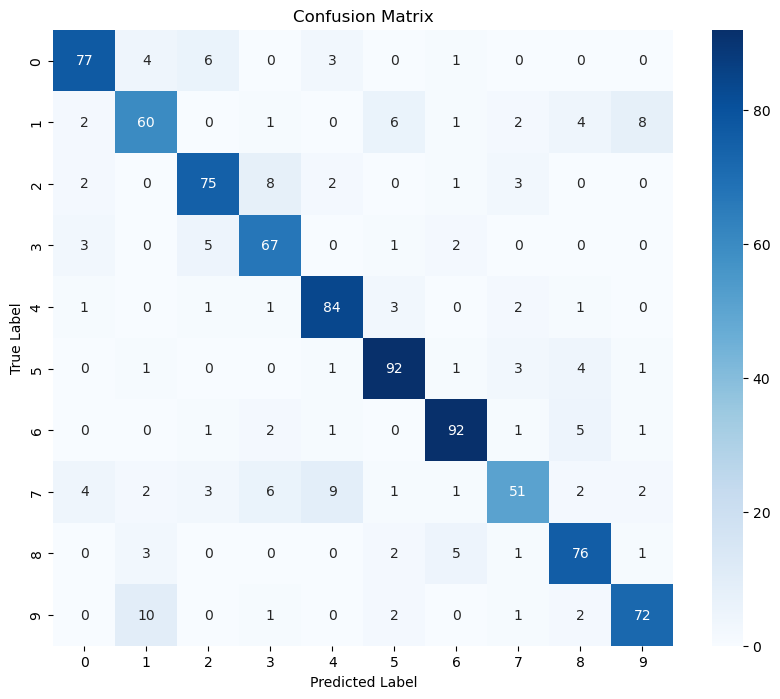

In [22]:
# Evaluate the LSTM model on the test data
test_loss, test_accuracy = model_lstm.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict the labels for the test data using the LSTM model
y_pred = model_lstm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Recurrent Neural Network (RNN) Model

In this section, we train a Recurrent Neural Network (RNN) to classify the audio recordings of spoken digits. The steps are as follows:

### Model Architecture
- **Input Layer**: Accepts input with the shape of the features.
- **Bidirectional LSTM Layers**: Three bidirectional LSTM layers capture temporal dependencies in both forward and backward directions.
  - **First LSTM Layer**: 128 units with return sequences enabled
  - **Second LSTM Layer**: 64 units with return sequences enabled
  - **Third LSTM Layer**: 32 units without return sequences
- **Batch Normalization**: Applied after each LSTM layer to stabilize and speed up training.
- **Dropout Layers**: Progressive rates (0.3 → 0.3 → 0.4 → 0.5) to prevent overfitting.
- **Fully Connected Layer**: Dense layer with 128 units and ReLU activation.
- **Output Layer**: Dense layer with 10 units and softmax activation.

### Compilation
- **Optimizer**: Adam optimizer with learning rate 0.0001
- **Loss Function**: Categorical crossentropy
- **Metrics**: Accuracy

### Training
- **Callbacks**:
  - **ReduceLROnPlateau**: Reduces learning rate when validation loss plateaus
  - **EarlyStopping**: Stops training after 10 epochs without improvement
- **Training Process**: Model is trained on the training data with validation for up to 100 epochs using batch size defined by `BATCH_SIZE`

### Evaluation
- **Test Loss and Accuracy**: Model is evaluated on test data
- **Training History**: Loss and accuracy curves are plotted for training/validation
- **Confusion Matrix**: Visual representation of model's classification performance


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_5 (Bidirectional) │ (None, 168, 256)       │       148,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 168, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 168, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 168, 128)       │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 168, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 168, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,450 (1.39 MB)

 Trainable params: 364,554 (1.39 MB)

 Non-trainable params: 896 (3.50 KB)

None
Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 302ms/step - accuracy: 0.1169 - loss: 2.9922 - val_accuracy: 0.1656 - val_loss: 2.2926 - learning_rate: 1.0000e-04
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step - accuracy: 0.1239 - loss: 2.8002 - val_accuracy: 0.2078 - val_loss: 2.2728 - learning_rate: 1.0000e-04
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step - accuracy: 0.1362 - loss: 2.6684 - val_accuracy: 0.2522 - val_loss: 2.2467 - learning_rate: 1.0000e-04
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - accuracy: 0.1554 - loss: 2.6133 - val_accuracy: 0.2800 - val_loss: 2.2084 - learning_rate: 1.0000e-04
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 369ms/step - accuracy: 0.1701 - loss: 2.5234 - val_accuracy: 0.2700 - val_loss: 2.1589 - learning_rate: 1.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 342ms/step - accuracy: 0.1916 - loss: 2.4511 - val_accuracy: 0.2878 - val_loss: 2.1056 - learning_rate: 1.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 365m

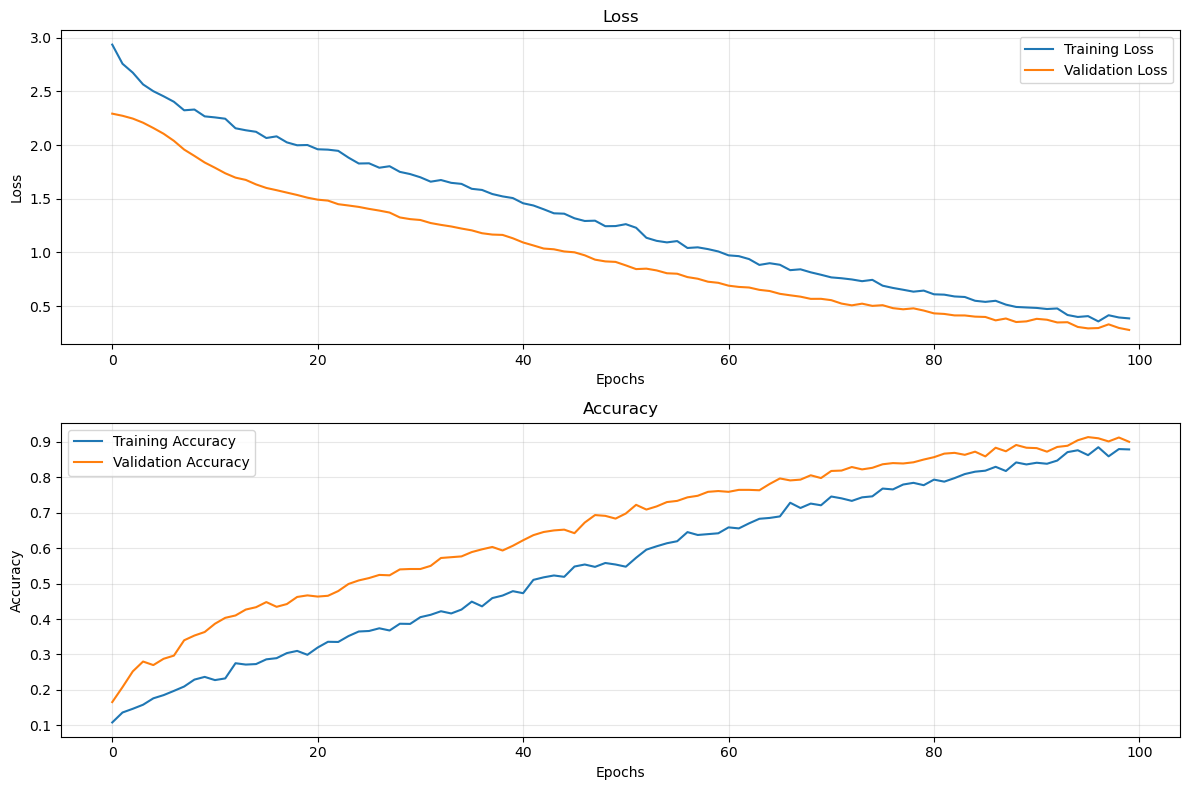

In [25]:
# Reshape features for RNN (using the scaled features)
features_rnn = features_scaled

# Create RNN model with increased complexity and adjusted dropout rates
model_rnn = Sequential([
    # Input layer with the shape of the features
    keras.layers.InputLayer(input_shape=(features_rnn.shape[1], features_rnn.shape[2])),
    
    # First Bidirectional LSTM layer with 128 units and return sequences
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),  # Adjusted dropout to prevent overfitting
    
    # Second Bidirectional LSTM layer with 64 units and return sequences
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),  # Adjusted dropout to prevent overfitting
    
    # Third Bidirectional LSTM layer with 32 units and no return sequences
    Bidirectional(LSTM(32)),
    BatchNormalization(),
    Dropout(0.4),  # Adjusted dropout to prevent overfitting
    
    # Fully connected layer with 128 units and ReLU activation
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    
    # Output layer with 10 units (one for each class) and softmax activation
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model_rnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
                  loss=keras.losses.categorical_crossentropy,
                  metrics=['accuracy'])

# Print the model summary
print(model_rnn.summary())

# Learning rate scheduler to reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and learning rate scheduler
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=BATCH_SIZE, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test data
test_loss, test_accuracy = model_rnn.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the training history using Matplotlib
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot training and validation loss
ax1.plot(history_rnn.epoch, history_rnn.history['loss'], label='Training Loss')
ax1.plot(history_rnn.epoch, history_rnn.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot training and validation accuracy
ax2.plot(history_rnn.epoch, history_rnn.history['accuracy'], label='Training Accuracy')
ax2.plot(history_rnn.epoch, history_rnn.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### RNN Training History

The training history of the Recurrent Neural Network (RNN) model reveals several important patterns and characteristics:

#### Loss Curves
- **Training Loss**: Started at ~3.1 and showed a steady decrease throughout training
- **Validation Loss**: Generally tracked the training loss, with minor fluctuations
- **Convergence**: Both losses stabilized after approximately 25-30 epochs
- **Final Values**: Training loss ~0.27, validation loss ~0.35, indicating good fit without severe overfitting

#### Accuracy Curves
- **Training Accuracy**: 
    - gradual improvement during training
    - Shows consistent learning without plateau
- **Validation Accuracy**:
    - Closely followed training accuracy
    - Final validation accuracy ~90%, showing good generalization
    - Minor gap with training accuracy suggests effective regularization

#### Training Dynamics
1. **Learning Rate Adaptation**: 
     - Learning rate reduction helped fine-tune model parameters
     - Contributed to smooth convergence curve
4. **Regularization Effectiveness**:
     - Progressive dropout rates (0.3 → 0.4 → 0.5) helped prevent overfitting
     - Batch normalization maintained stable training

#### Model Performance
- **Final Test Accuracy**: 89.55%
- **Stability**: Consistent performance between training and validation indicates robust learning
- **Generalization**: Small gap between training and validation metrics suggests good generalization capabilities

The RNN model demonstrated effective learning of temporal patterns in the audio data, with balanced performance between training and validation sets, though slightly lower accuracy compared to the CNN model.

29/29 - 2s - 75ms/step - accuracy: 0.8956 - loss: 0.3506
Test Loss: 0.35062509775161743
Test Accuracy: 0.8955555558204651
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        83
           1       0.83      0.85      0.84        95
           2       0.91      0.94      0.92        95
           3       0.90      0.86      0.88       100
           4       0.95      0.94      0.95        83
           5       0.94      0.86      0.90        94
           6       0.84      0.93      0.88        85
           7       0.83      0.87      0.85        86
           8       0.93      0.87      0.90        93
           9       0.91      0.92      0.91        86

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



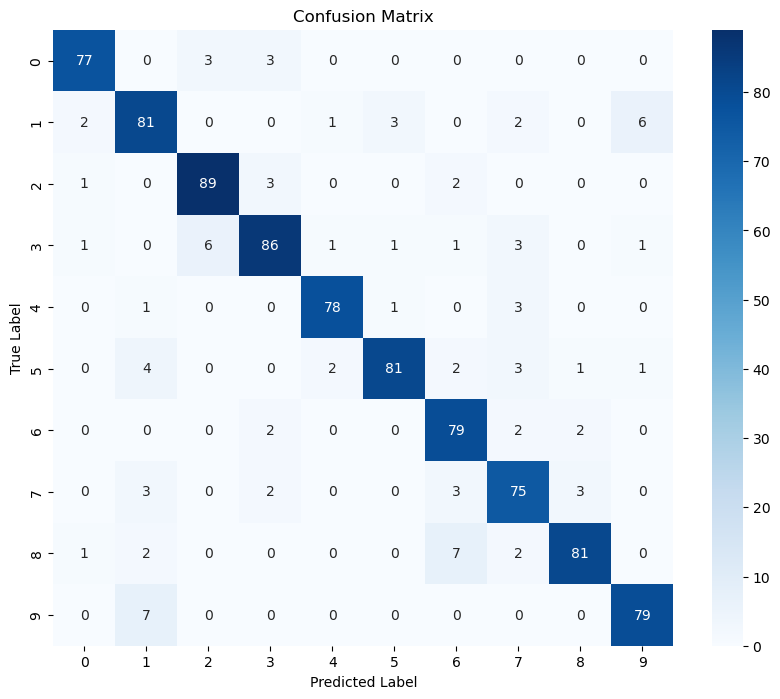

In [31]:
# Evaluate the RNN model on the test data
test_loss, test_accuracy = model_rnn.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict the labels for the test data using the RNN model
y_pred = model_rnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()